In [1]:
import numpy as np
import matplotlib.pyplot as plt    
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape
df.info()  
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
df = df.drop_duplicates()
df.shape

(3577, 8)

In [5]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [6]:
df['car_age'] = 2025 - df['year']
df = df.drop(columns=['year', 'name'])
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,car_age
0,60000,70000,Petrol,Individual,Manual,First Owner,18
1,135000,50000,Petrol,Individual,Manual,First Owner,18
2,600000,100000,Diesel,Individual,Manual,First Owner,13
3,250000,46000,Petrol,Individual,Manual,First Owner,8
4,450000,141000,Diesel,Individual,Manual,Second Owner,11


removing outliers

In [7]:
upper_limit_price = df['selling_price'].quantile(0.99)
df = df[df['selling_price'] <= upper_limit_price]


upper_limit_km = df['km_driven'].quantile(0.99)
df = df[df['km_driven'] <= upper_limit_km]

In [8]:
# Add interaction features
df['price_per_km'] = df['selling_price'] / df['km_driven']


# Log-transform skewed features
df['log_km_driven'] = np.log1p(df['km_driven'])

In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Encode 'owner' column
label_encoder = LabelEncoder()
df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['seller_type'] = label_encoder.fit_transform(df['seller_type'])
   

# One-hot encode other categorical columns
df = pd.get_dummies(df, columns=['fuel','owner'], drop_first=True)
df

,selling_price,km_driven,seller_type,transmission,car_age,price_per_km,log_km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,1,1,18,0.857143,11.156265,False,False,False,True,False,False,False,False
1,135000,50000,1,1,18,2.700000,10.819798,False,False,False,True,False,False,False,False
2,600000,100000,1,1,13,6.000000,11.512935,True,False,False,False,False,False,False,False
3,250000,46000,1,1,8,5.434783,10.736418,False,False,False,True,False,False,False,False
4,450000,141000,1,1,11,3.191489,11.856522,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,409999,80000,1,1,11,5.124987,11.289794,True,False,False,False,False,True,False,False
4336,409999,80000,1,1,11,5.124987,11.289794,True,False,False,False,False,True,False,False
4337,110000,83000,1,1,16,1.325301,11.326608,False,False,False,True,False,True,False,False
4338,865000,90000,1,1,9,9.611111,11.407576,True,False,False,False,False,False,False,False


In [10]:
y = df['selling_price']
X = df.drop(columns=['selling_price'])
y_log = np.log1p(y)
print(X)

      km_driven  seller_type  transmission  car_age  price_per_km  \
0         70000            1             1       18      0.857143   
1         50000            1             1       18      2.700000   
2        100000            1             1       13      6.000000   
3         46000            1             1        8      5.434783   
4        141000            1             1       11      3.191489   
...         ...          ...           ...      ...           ...   
4335      80000            1             1       11      5.124987   
4336      80000            1             1       11      5.124987   
4337      83000            1             1       16      1.325301   
4338      90000            1             1        9      9.611111   
4339      40000            1             1        9      5.625000   

      log_km_driven  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
0         11.156265        False          False     False         True   
1         10.819798    

training the model 

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

y = df['selling_price']
X = df.drop(columns=['selling_price'])
y_log = np.log1p(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.2, random_state=42)

#Train the Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=10)
rf_model.fit(X_train, y_train)

#Make Predictions
y_pred_log = rf_model.predict(X_test)

# Reverse the log transformation for predictions and actual values
y_pred = np.expm1(y_pred_log)  # Reverse log1p transformation
y_test_original = np.expm1(y_test)

#Evaluate the Model
mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 31671.831325601812
Mean Squared Error (MSE): 12612063937.014116
Root Mean Squared Error (RMSE): 112303.44579314615
R² Score: 0.9107633842964539


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_log = model.predict(X_test)
    
    # Reverse log transformation
    y_pred = np.expm1(y_pred_log)
    y_test_original = np.expm1(y_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test_original, y_pred)
    mse = mean_squared_error(y_test_original, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_original, y_pred)
    
    print(f"Model: {model.__class__.__name__}")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R² Score:", r2)
    print("-" * 50)

In [14]:
# Linear Regression
linear_model = LinearRegression()
train_and_evaluate_model(linear_model, X_train, X_test, y_train, y_test)

# Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=5)
train_and_evaluate_model(gbr_model, X_train, X_test, y_train, y_test)

# XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=200, max_depth=5, learning_rate=0.1)
train_and_evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

Model: LinearRegression
Mean Absolute Error (MAE): 151430.19415005622
Mean Squared Error (MSE): 70245530782.15749
Root Mean Squared Error (RMSE): 265038.7344939556
R² Score: 0.5029779846816208
--------------------------------------------------
Model: GradientBoostingRegressor
Mean Absolute Error (MAE): 20325.280431497817
Mean Squared Error (MSE): 3547442127.2361836
Root Mean Squared Error (RMSE): 59560.407379703036
R² Score: 0.9749000852342895
--------------------------------------------------
Model: XGBRegressor
Mean Absolute Error (MAE): 20781.448623352924
Mean Squared Error (MSE): 3840060767.1672726
Root Mean Squared Error (RMSE): 61968.223850351504
R² Score: 0.9728296630377614
--------------------------------------------------


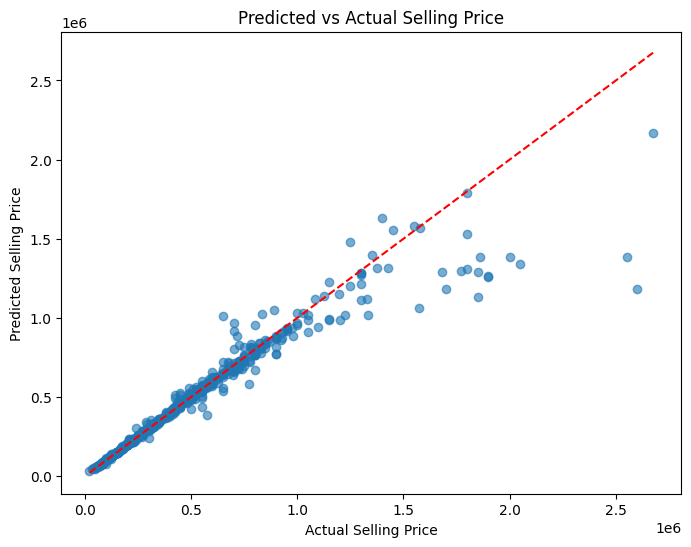

In [15]:
# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_pred, alpha=0.6)
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs Actual Selling Price")
plt.show()

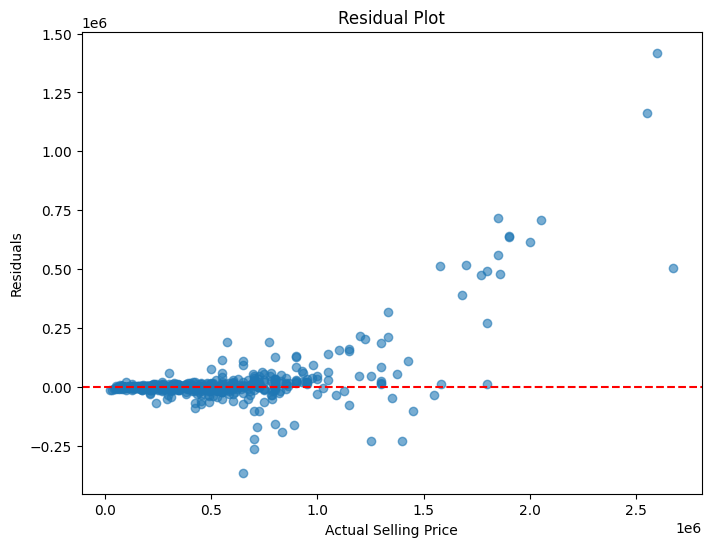

In [16]:
# Residuals
residuals = y_test_original - y_pred
# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [17]:
# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - y_pred) / y_test_original)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape, "%")

# Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean(((y_test_original - y_pred) / y_test_original) ** 2)) * 100
print("Root Mean Squared Percentage Error (RMSPE):", rmspe, "%")

Mean Absolute Percentage Error (MAPE): 4.063871199321779 %
Root Mean Squared Percentage Error (RMSPE): 8.165284614585104 %
